# Import Library

In [1]:
from __future__ import print_function
from numpy.random import seed
import random
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

import os
os.environ['PYTHONHASHSEED'] = '0'
seed(42)
random.seed(12345)
session_conf =  tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K
tf.random.set_seed(1234)

import tensorflow as tf
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


from numpy import array
from numpy import hstack
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import keras.backend as K
from keras_tqdm import TQDMNotebookCallback
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from keras.callbacks import History

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Import File

In [2]:
df = pd.read_csv('gold_price_update2.csv')

In [3]:
df

,date,price
0,4-Jan-10,17500
1,5-Jan-10,17650
2,6-Jan-10,17600
3,7-Jan-10,17700
4,8-Jan-10,17600
...,...,...
3892,26-Sep-22,29450
3893,27-Sep-22,29400
3894,28-Sep-22,29400
3895,29-Sep-22,29700


In [4]:
df.columns = ['date', 'price']
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
dataset=df
dataset

,price
date,
2010-01-04,17500
2010-01-05,17650
2010-01-06,17600
2010-01-07,17700
2010-01-08,17600
...,...
2022-09-26,29450
2022-09-27,29400
2022-09-28,29400


Text(0.5, 0, 'Year')

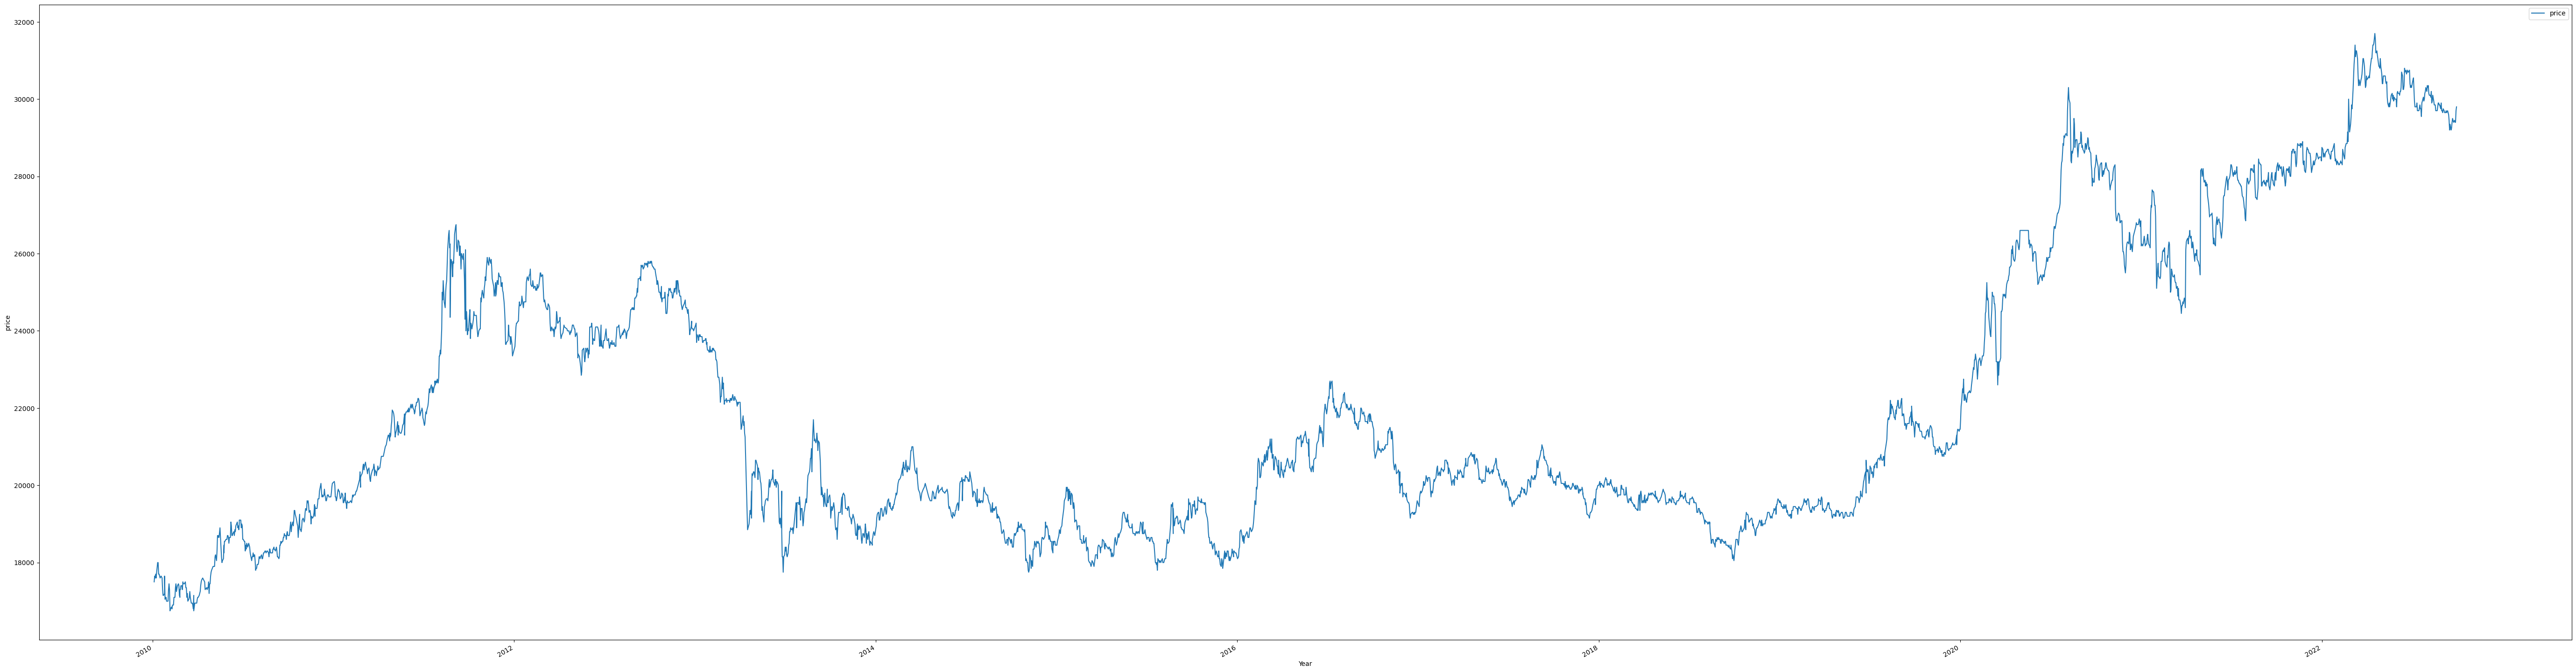

In [5]:
df.plot(figsize=(70,20))
plt.ylabel('price')
plt.xlabel('Year')

In [6]:
dataset=np.array(dataset)
dataset

array([[17500],
       [17650],
       [17600],
       ...,
       [29400],
       [29700],
       [29800]], dtype=int64)

# Data Set 6 วัน

In [7]:
dataset_X,dataset_Y= [],[]
for i in range(6,len(dataset)):
    dataset_X.append(dataset[i-6:i,0])
    dataset_Y.append(dataset[i,0])
dataset_X,dataset_Y=np.array(dataset_X),np.array(dataset_Y)


In [8]:
dataset_X.shape

(3891, 6)

In [9]:
dataset_X=dataset_X.reshape(3891,6)
dataset_X=pd.DataFrame(dataset_X)

In [10]:
dataset_X

,0,1,2,3,4,5
0,17500,17650,17600,17700,17600,17750
1,17650,17600,17700,17600,17750,18000
2,17600,17700,17600,17750,18000,18000
3,17700,17600,17750,18000,18000,17700
4,17600,17750,18000,18000,17700,17700
...,...,...,...,...,...,...
3886,29200,29250,29400,29500,29450,29400
3887,29250,29400,29500,29450,29400,29450
3888,29400,29500,29450,29400,29450,29400
3889,29500,29450,29400,29450,29400,29400


In [11]:
#สร้าง Dataset_Y
dataset_Y=dataset_Y.reshape(3891,1)

dataset_Y=pd.DataFrame(dataset_Y)

In [12]:
#ทำการแบ่ง Train และ Test 70:30

train_ratio = .7 
train_x = dataset_X[:2723]
train_y =dataset_Y[:2723]
test_x= dataset_X[2723:]
test_y= dataset_Y[2723:]
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((2723, 6), (2723, 1), (1168, 6), (1168, 1))

In [13]:
#ทำการแปลง train_x,train_y,test_x,test_y เป็น array

train_x = np.array(train_x)
train_y =np.array(train_y)
test_x=np.array(test_x)
test_y= np.array(test_y)
train_x=train_x.reshape(2723,6)
train_y=train_y.reshape(2723,1)
test_x=test_x.reshape(1168,6)
test_y=test_y.reshape(1168,1)

In [14]:
#ทำการ Rescale
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler().fit(train_x)
scalery = StandardScaler().fit(train_y)
train_x = scalerX.transform(train_x)
train_y = scalery.transform(train_y)
test_x = scalerX.transform(test_x)
test_y = scalery.transform(test_y)


In [15]:
#ทำการ reshapeข้อมูลให้เป็น array 2D

train_x=train_x.reshape(2723,6)
train_y=train_y.reshape(2723,1)
test_x=test_x.reshape(1168,6)
test_y=test_y.reshape(1168,1)

In [16]:
import sys,os,time,datetime
import xgboost as xgb
from sklearn.metrics import mean_squared_error


start_tm = time.time()

model = xgb.XGBRegressor(base_score=0.5, booster='gblinear',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:absoluteerror',
                       max_depth=3,
                       learning_rate=0.001)
XGB =model.fit(train_x, train_y,
        eval_set=[(train_x, train_y), (test_x, test_y)],
        verbose=100)

print(f">>>>> Training Time >>>> {time.time() - start_tm} seconds")






[16:39:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.

[0]	validation_0-mae:1.00327	validation_1-mae:2.20341
[100]	validation_0-mae:0.65858	validation_1-mae:1.16692
[200]	validation_0-mae:0.40088	validation_1-mae:0.36560
[300]	validation_0-mae:0.29305	validation_1-mae:0.17570
[400]	validation_0-mae:0.20123	validation_1-mae:0.15318
[500]	validation_0-mae:0.12619	validation_1-mae:0.14483
[600]	validation_0-mae:0.09068	validation_1-mae:0.11497
[700]	validation_0-mae:0.08034	validation_1-mae:0.10448
[800]	validation_0-mae:0.07801	validation_1-mae:0.10412
[822]	validation_0-mae:0.07780	validation_1-mae:0.10417
>>>>> Training Time >>>> 0.25328636169433594 seconds


In [17]:
y_pred = XGB.predict(test_x)

In [18]:
y_pred_real=scalery.inverse_transform(y_pred.reshape(1168,1))

In [19]:
test_y =test_y.reshape(1168,1)

In [20]:
test_y_real = scalery.inverse_transform(test_y)

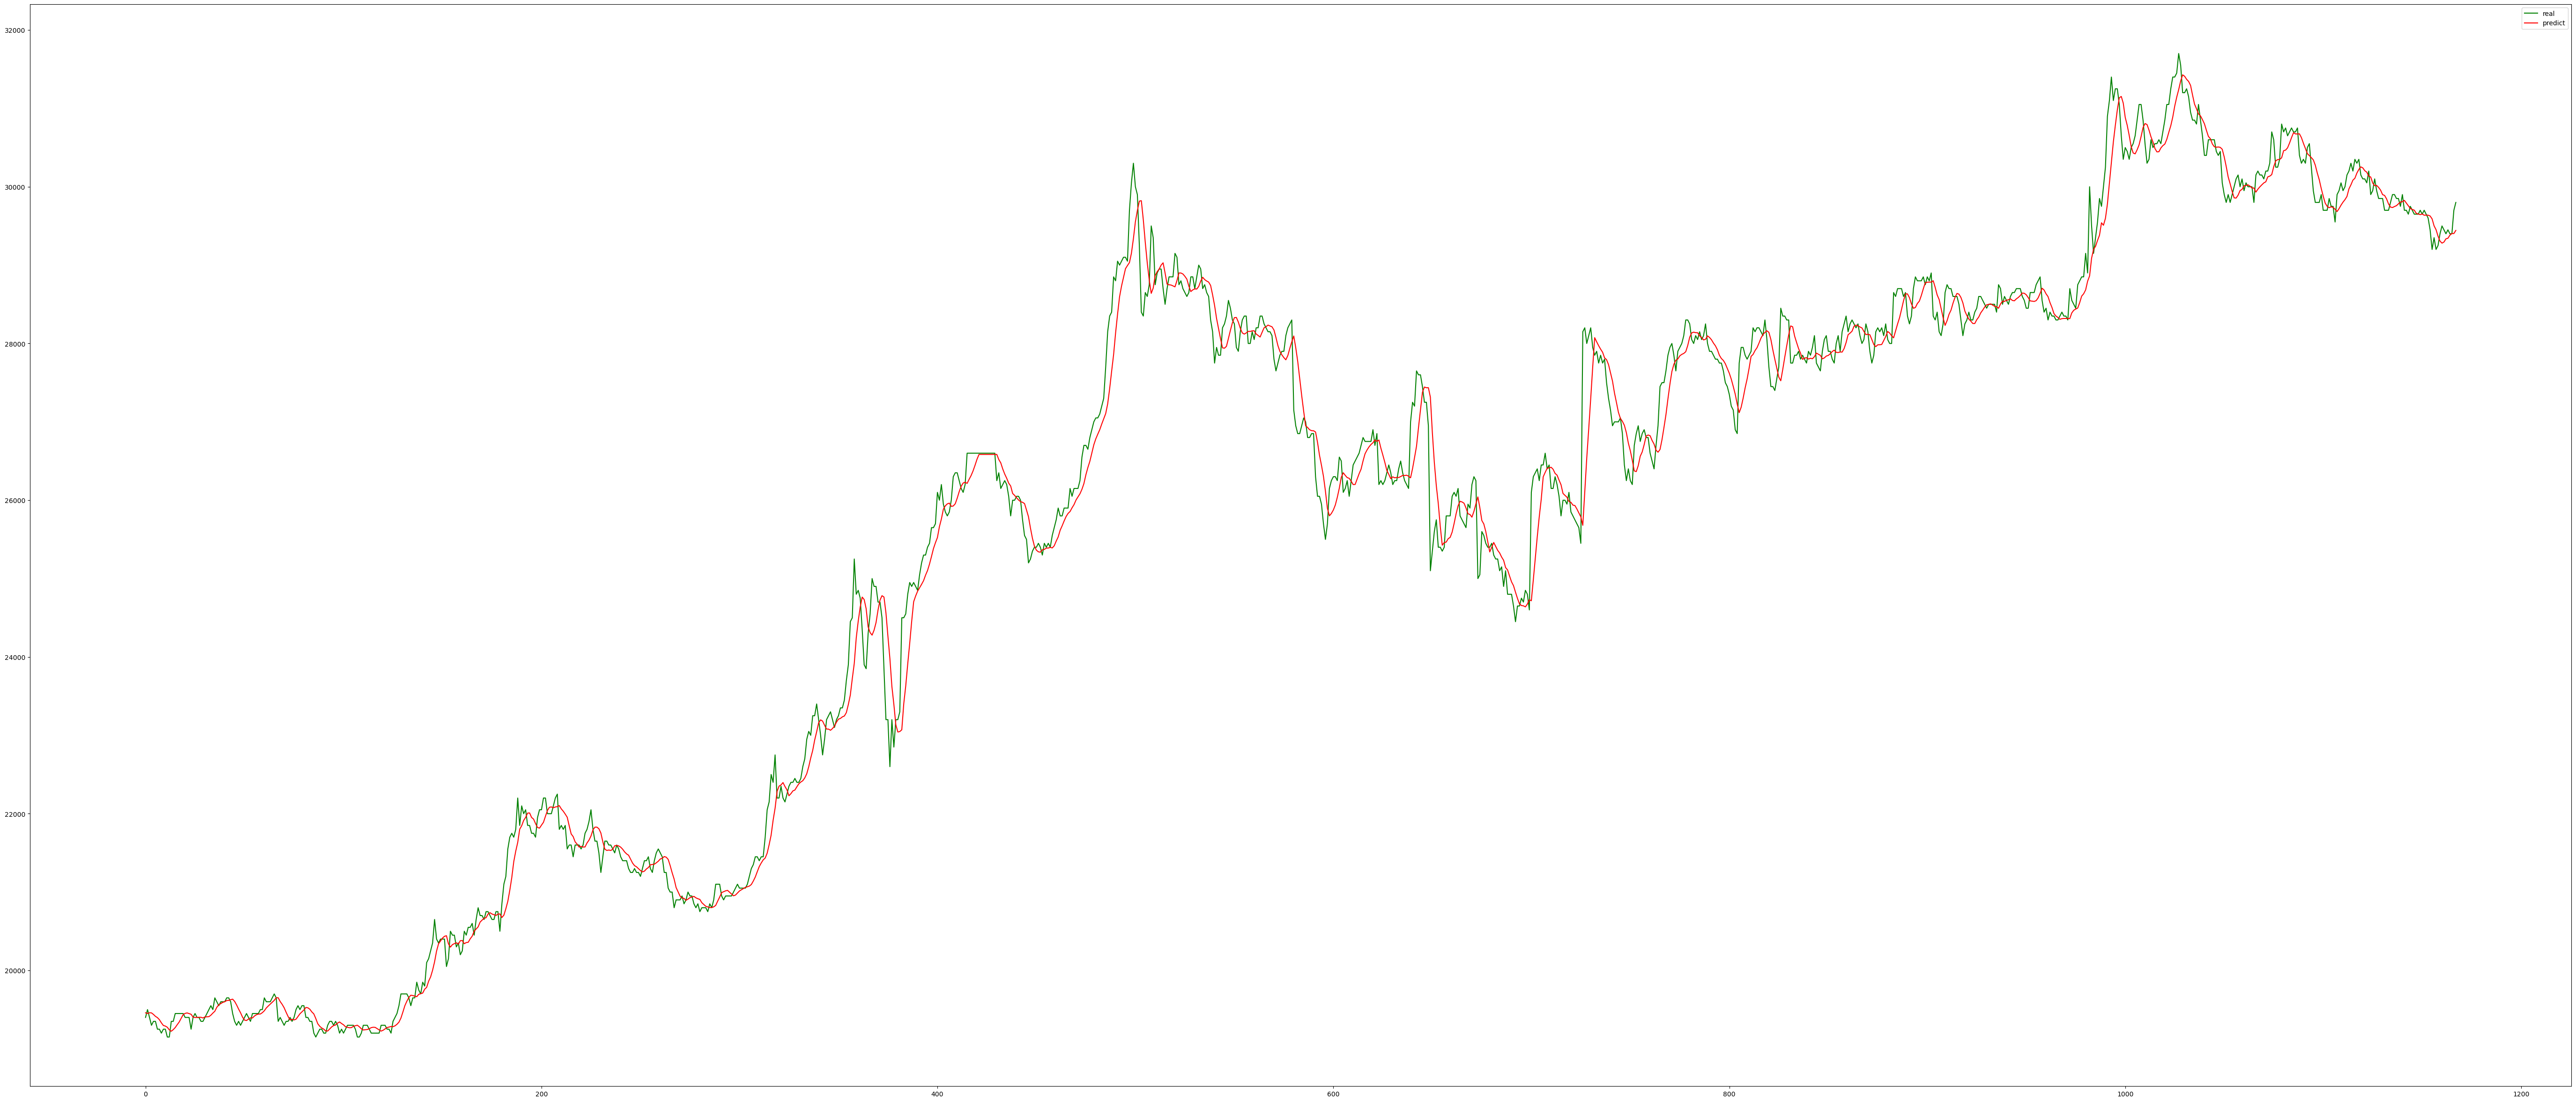

In [21]:
y_pred = model.predict(test_x)
plt.figure(figsize=(70, 30))
plt.plot(test_y_real,color="green")
plt.plot(y_pred_real,color="red")
plt.legend(['real', 'predict',])

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f'MAE:  {mean_absolute_error(test_y_real,y_pred_real)}')
print(f'RMSE:{np.sqrt(mean_squared_error(test_y_real,y_pred_real))}')
print(f'R-Squrea:{r2_score(test_y_real,y_pred_real)}')
print(f'MAPE: {np.mean(np.abs((test_y_real - y_pred_real)/test_y_real))*100}')

MAE:  224.47853569135273
RMSE:337.0339371941715
R-Squrea:0.9916579911028168
MAPE: 0.8625999171029006


In [23]:
pd.DataFrame(y_pred_real).to_csv('y_pred_XGB.csv')
pd.DataFrame(test_y_real).to_csv('y_real_XGB.csv')

In [24]:
import pickle
pickle.dump(model, open('modelXGB.pkl','wb'))

model = pickle.load(open('modelXGB.pkl','rb'))
print(model.predict([[28500,28550,28600,29000,29000,29500 ]]))

[28775.975]


In [25]:
model = pickle.load(open('modelXGB.pkl','rb'))
print(model.predict([[29700,29900,29950,29800,29800,29900 ]]))


[29733.666]


In [26]:
29850-29734.33

115.66999999999825